In [49]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [21]:
df=pd.read_csv("Forest_fire_cleaned.csv")
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1


In [22]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [23]:
df['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1)

In [24]:
df["Classes"].value_counts()

1    137
0    106
Name: Classes, dtype: int64

In [25]:
##drop month,day and yyear
df.drop(['day','month','year'],axis=1,inplace=True)

In [26]:
## Independent And dependent features
X=df.drop('FWI',axis=1)
y=df['FWI']

In [27]:
X

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,1
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,1
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,1
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,1
...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,1,2
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0,2
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0,2
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0,2


In [28]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [29]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [30]:
X_train.shape,X_test.shape

((182, 11), (61, 11))

In [35]:
## Feature Selection based on correlaltion
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


## Feature Selection

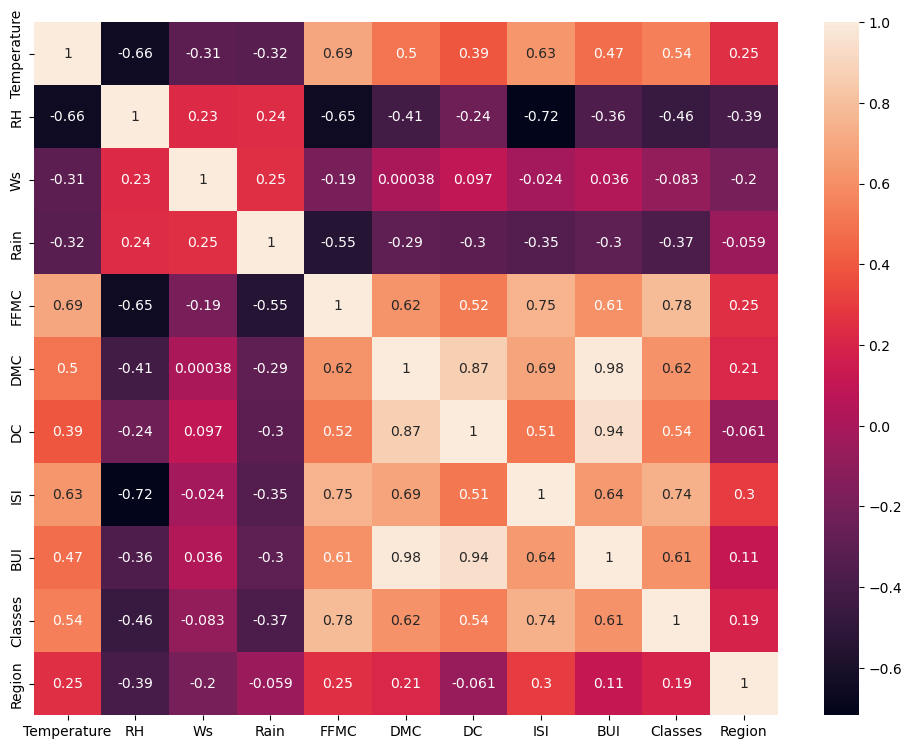

In [32]:
## Check for multicollinearity
plt.figure(figsize=(12,9))
sns.heatmap(X_train.corr(),annot=True)
plt.show()

In [39]:
def correlation(dataset,threshold):
    col_corr=set()
    corr=dataset.corr()
    for i in range(len(corr.columns)):
        for j in range(i):
            if abs(corr.iloc[i,j])>threshold:
                col_name=corr.columns[i]
                col_corr.add(col_name)
    return col_corr

In [40]:
corr_features=correlation(X_train,0.85)

In [41]:
corr_features

{'BUI', 'DC'}

In [42]:
## drop features when correlation is more than 0.85 
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_train.shape,X_test.shape

((182, 9), (61, 9))

## Feature Scaling Or Standardization

In [43]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [44]:
x_train_scaled=scaler.fit_transform(X_train)
x_test_scaled=scaler.transform(X_test) 

## Box Plots To understand Effect Of Standard Scaler

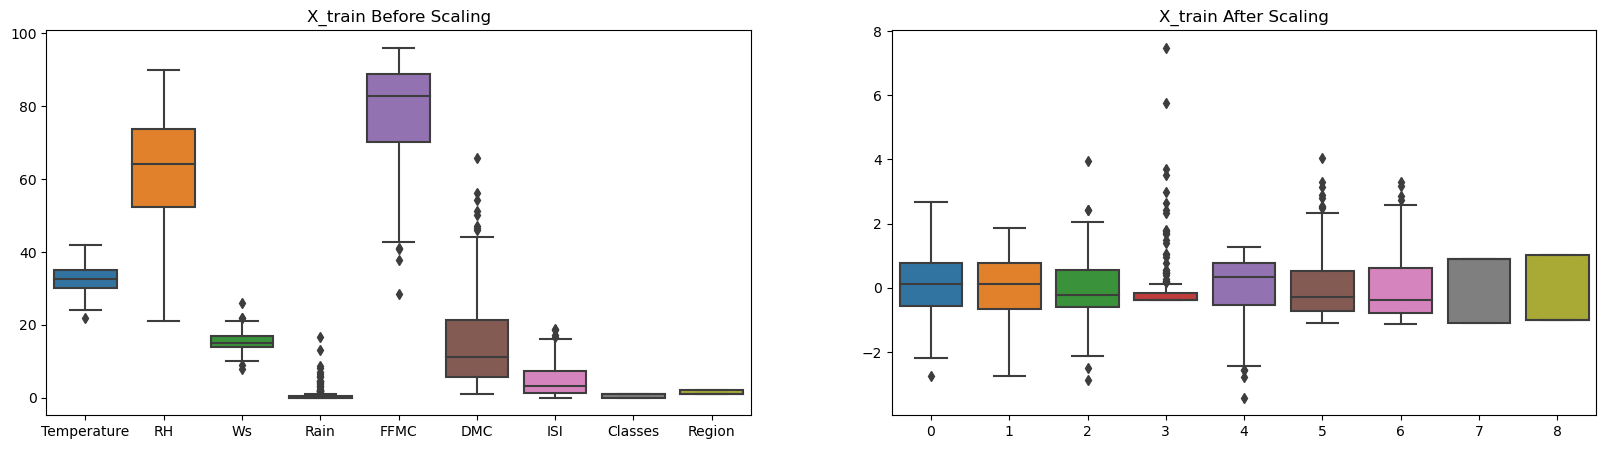

In [55]:
plt.subplots(figsize=(20,5))
plt.subplot(1,2,1)
sns.boxplot(X_train)
plt.title('X_train Before Scaling')
plt.subplot(1,2,2)
sns.boxplot(x_train_scaled)
plt.title('X_train After Scaling')
plt.show()

## Linear Regression Model

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
regressor=LinearRegression()

In [57]:
regressor.fit(x_train_scaled,y_train)
y_predict=regressor.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_predict)
R2_score=r2_score(y_test,y_predict)

In [60]:
print("Mean absolute error", mae)
print("R2 Score", R2_score)

Mean absolute error 0.5468236465249985
R2 Score 0.9847657384266951


## Ridge Regression model

In [63]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge=Ridge()

In [64]:
ridge.fit(x_train_scaled,y_train)
y_predict=ridge.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_predict)
R2_score=r2_score(y_test,y_predict)

In [66]:
print("Mean absolute error", mae)
print("R2 Score", R2_score)

Mean absolute error 0.5642305340105692
R2 Score 0.9842993364555513


## Lasso Regression

In [74]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso=Lasso()
lasso.fit(x_train_scaled,y_train)
y_pred=lasso.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_predict)
R2_score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", R2_score)

Mean absolute error 0.5642305340105692
R2 Score 0.9492020263112388


## Elasticnet Regression

In [75]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elastic=ElasticNet()
elastic.fit(x_train_scaled,y_train)
y_pred=elastic.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_predict)
R2_score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", R2_score)

Mean absolute error 0.5642305340105692
R2 Score 0.8753460589519703


In [78]:
import pickle
pickle.dump(scaler,open("scaler.pkl","wb"))
pickle.dump(ridge,open("ridge.pkl","wb"))